<a href="https://colab.research.google.com/github/Kaushal-Top5699/classification_NN_tensorflow/blob/main/classification_NN_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Classification with Tensorflow.**
Introduction to Neural Network Classification with **TensorFlow**. In a classification problem you try to classify something as one thing or another.

A few types,
1. Binary Classification
2. Multiclass Classification
3. Multilabel Classification

In [ ]:
# Creating sample/toy data.
from sklearn.datasets import make_circles
# Make 1000 exmaples
n_samples = 1000
# Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# Lets visualise the data.
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


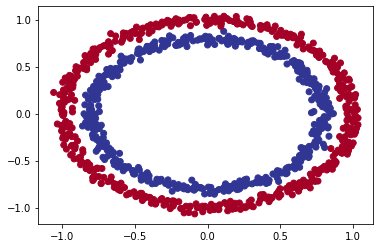

In [ ]:
# Visualise with a plot.
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

### **Input and output shapes.**

In [ ]:
# Checking the shapes of features and labels.
X.shape, y.shape
# y is scalar therefore, no dimension output here.

((1000, 2), (1000,))

In [ ]:
# How many samples we are working with.
len(X), len(y)

(1000, 1000)

In [ ]:
# View 1st example features and label.
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### **Building a Model**

In [ ]:
import tensorflow as tf

# Model 1
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

In [ ]:
model_1.fit(X, y, epochs = 10, verbose = 0)

In [ ]:
# To improve our model, lets run it for longer.
model_1.fit(X, y, epochs = 200, verbose = 0)

In [ ]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

We got an accuracy of just 50%, therefore, let's add an extra layer and up notch the things.

In [ ]:
# Model 2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

In [ ]:
model_2.fit(X, y, epochs = 10, verbose = 0)

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Looks like we just got an increment by 1. Lets try ruuning it for more epochs.

In [ ]:
model_2.fit(X, y, epochs = 100, verbose = 0)

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

### To improve our model we need make some changes namely, adding extra layers, neurons or changing the optimizer.

In [ ]:
# Model 3
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_3.fit(X, y, epochs = 100)

In [ ]:
model_3.evaluate(X, y) 

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5004


[0.6935430765151978, 0.5004062652587891]

In [ ]:
model_3.predict(X)

Now since, we are still getting the same result even after improving our model, its a good idea to visualize the model.

1. Function that takes in trained model's (X) features and (y) labels.
2. Create meshgrid of different X values.
3. Make predictions across meshgrid.
4. Plot the predictions as well as line between zeros(where each unique class falls).


In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  # Define the aixs boundaries of the plot and create a meshgrid.
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  # Create X values.
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together
   
  # Make predictions.
  y_pred = model.predict(x_in)

  # Check for multi-class.
  if len(y_pred[0] > 1):
    print("Multi-Class Classification")
    # If so we have to reshape predictions for plotting
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print("Binary Classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary.
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
Multi-Class Classification


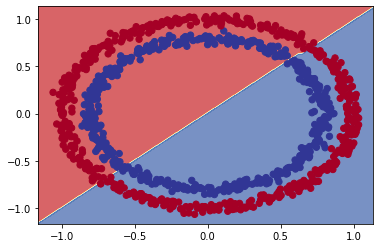

In [ ]:
plot_decision_boundary(model_3, X = X, y = y)

The data above is non-linear which in simple language is non-straight. However, before we fit our model, make sure that the loss function is mae or mse, the above model has a BinaryCrossenrtopy() as loss function.

In [ ]:
# Lets see if our model can be used for regression problem.
tf.random.set_seed(42)

# Create a regression data.
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Splitting data into training and testing.
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
# Re-creating our model 3.
tf.config.run_functions_eagerly(True)
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

In [ ]:
X_reg_train.shape, y_reg_train.shape

(TensorShape([150]), TensorShape([150]))

In [ ]:
# Fitting our model to regression data.
model_4.fit(tf.expand_dims(X_reg_train, axis = 1), y_reg_train, epochs = 100)

In [ ]:
model_4.evaluate(X_reg_train, y_reg_train)

5/5 [==============================] - 0s 10ms/step - loss: 37.4077 - mae: 37.4077


[37.40774917602539, 37.40774917602539]

2/2 [==============================] - 0s 6ms/step


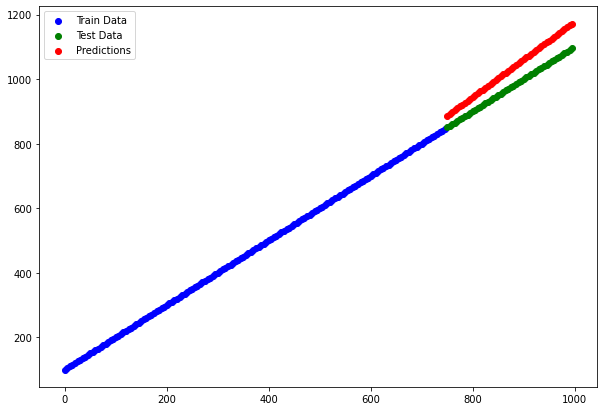

In [ ]:
# Make predictions.
y_reg_pred = model_4.predict(X_reg_test)

# Plot the predictions.
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c = "b", label = "Train Data")
plt.scatter(X_reg_test, y_reg_test, c = "g", label = "Test Data")
plt.scatter(X_reg_test, y_reg_pred, c = "r", label = "Predictions")
plt.legend()

The missing piece: Non-linearity

In [ ]:
# Setting random seed.
tf.random.set_seed(42)

# 1. Creat model.
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])

# 2. compile.
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

In [ ]:
# Fit the model.
history = model_4.fit(X, y, epochs = 100, verbose = 0)

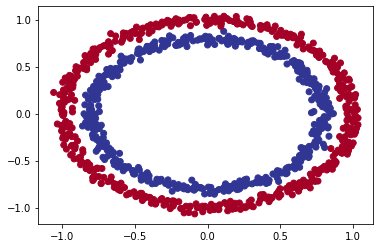

In [ ]:
# Check our data.
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

  1/313 [..............................] - ETA: 18s

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 2s 7ms/step
Multi-Class Classification


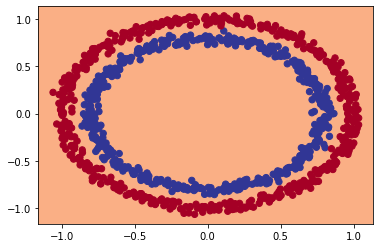

In [54]:
plot_decision_boundary(model_4, X = X, y = y)

In [ ]:
from keras.layers.attention.multi_head_attention import activation
# Lets trying adding the first non-linear activation "reLU"

tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

histroy = model_5.fit(X, y, epochs = 100)

### Still our model is not performing well! Its still not learning and its seems like its just guessing.

In [ ]:
# Lets try increasing the number of units in our hidden layer.
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation = tf.keras.activations.relu)
])

model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

history = model_6.fit(X, y, epochs = 100)

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 1s 4ms/step
Multi-Class Classification


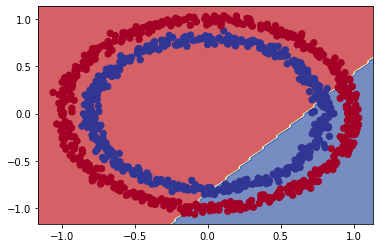

In [60]:
plot_decision_boundary(model_6, X = X, y = y)

In [61]:
model_6.evaluate(X, y)

 9/32 [=======>......................] - ETA: 0s - loss: 1.9109 - accuracy: 0.3715

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


32/32 [==============================] - 1s 17ms/step - loss: 1.9719 - accuracy: 0.3380


[1.9719146490097046, 0.33799999952316284]

Looks like our model is improving...
Lets now try adding one more hidden layer with 2 units.

In [64]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu)
])

model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

In [66]:
histroy_2 = model_7.fit(X, y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


32/32 [==============================] - 2s 71ms/step - loss: 2.4607 - accuracy: 0.2930
Epoch 2/100
32/32 [==============================] - 3s 89ms/step - loss: 2.4593 - accuracy: 0.2820
Epoch 3/100
32/32 [==============================] - 1s 28ms/step - loss: 2.4580 - accuracy: 0.2720
Epoch 4/100
32/32 [==============================] - 1s 26ms/step - loss: 2.4569 - accuracy: 0.2690
Epoch 5/100
32/32 [==============================] - 1s 25ms/step - loss: 2.4558 - accuracy: 0.2660
Epoch 6/100
32/32 [==============================] - 1s 27ms/step - loss: 2.4548 - accuracy: 0.2560
Epoch 7/100
32/32 [==============================] - 1s 26ms/step - loss: 2.4537 - accuracy: 0.2570
Epoch 8/100
32/32 [==============================] - 1s 27ms/step - loss: 2.4527 - accuracy: 0.2600
Epoch 9/100
32/32 [==============================] - 1s 25ms/step - loss: 2.4519 - accuracy: 0.2540
Epoch 10/100
32/32 [==============================] - 1s 26ms/step - loss: 2.4510 - accuracy: 0.2520
Epoch 11/10

In [67]:
model_7.evaluate(X, y)

11/32 [=========>....................] - ETA: 0s - loss: 2.4144 - accuracy: 0.3324

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


32/32 [==============================] - 1s 15ms/step - loss: 2.4179 - accuracy: 0.3140


[2.4178569316864014, 0.3140000104904175]

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 2s 5ms/step
Multi-Class Classification


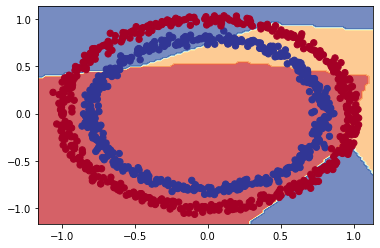

In [68]:
plot_decision_boundary(model_7, X=X, y=y)